# 02 - Regional Literature: *Indian Monsoon Onset and Withdrawal*

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import mapping, Point
import datetime
import numpy as np
import rioxarray
from scipy.interpolate import griddata

import xarray as xr

from mpl_toolkits.axes_grid1 import make_axes_locatable

from visualization.custom_plots import standard_format, day_of_year_to_date, standard_format_single, plot_seasons_bk_results


## The Indian Summer Monsoon

The term Monsoon probably derives from the Arabic word mausim or the Malayan monsin which both mean season [Zhisheng et al., 2015], and  it is traditionally associated with the rainy period which accompanies a change in the seasonal prevailing wind in much of the tropics. 

Areas prone to GM are identified by the IPCC as those in which the annual precipitation range (i.e. the difference between the annual maximum and minimum precipitation) exceeds 2.5 ${mm}/{day}$ , with no further requirements. However, this could
lead to the inclusion of areas where the source of precipitation is not monsoonal. Therefore, a subsequent analysis was performed by the IPCC based on the published literature [IPCC, 2021a].

<img src="../images/IPCC_AR6_WGI_AV_Figure_1.png" width="700">

## The Indian Meteorological Departmente (IMD)

The Indian Meteorological Department (IMD) is the primary national agency responsible for meteorological observations, weather forecasting, and seismology in India. Established in 1875, IMD operates under the Ministry of Earth Sciences. One of its key areas of focus is the study of the monsoon, a crucial weather phenomenon for India's agriculture and economy. IMD meticulously monitors and predicts the dates of onset and withdrawal of the monsoon, providing critical data and forecasts to aid in agricultural planning, water resource management, and disaster preparedness. 

In [ ]:
if not os.path.exists(results_path_file) or overwrite_results:
    
    result.attrs=dict(
            Description="Dataset with seasonal onset dates obtained with Radially Constrained Clustering",
            Parameters=(

                f"Number of seasons: {n_seasons}",
                f"Number of iterations: {n_iters}",
                f"Learning rate: {learning_rate}",
                f"Minimum length of seasons: {min_len}",
                f"Clustering mode: {mode}",
                f"Initializtion dates: {[day_of_year_to_date(x) for x in starting_bp]}",
        
            )
        )

    result.to_netcdf(results_path_file)

In [6]:
# Geopackages with boundaries
country_boundary_file   = '../data/raw/external/GADM41_IND.gpkg' 
world_boundary_file     = '../data/raw/external/GADM41_WORLD.gpkg' 

# Path for results
results_path_image  = f'../data/results/images/literature_reference_sates.png'

# Geodataframes for boudaries - Level 0 is for country boundaries 
country_boundary    = gpd.read_file(country_boundary_file, layer = 'ADM_ADM_1')
world_boundary      = gpd.read_file(world_boundary_file, layer = 'ADM_0')

In [7]:
gridded_dates_file      = '../data/preprocessed/external/monsoon_dates.nc'
ds_rast = xr.open_dataset(gridded_dates_file)

ds_rast

<xarray.Dataset>
Dimensions:      (lon: 116, lat: 105, cluster: 2)
Coordinates:
  * lon          (lon) float64 68.25 68.5 68.75 69.0 ... 96.25 96.5 96.75 97.0
  * lat          (lat) float64 7.0 7.25 7.5 7.75 8.0 ... 32.25 32.5 32.75 33.0
  * cluster      (cluster) int64 0 1
Data variables:
    spatial_ref  int64 ...
    date         (lat, lon, cluster) float64 ...
Attributes:
    Description:  Interpolated onset and withdrawal dates of the monsoon seas...
    History:      1. Country boundaries were loaded from GADM41_IND.gpkg.\n2....

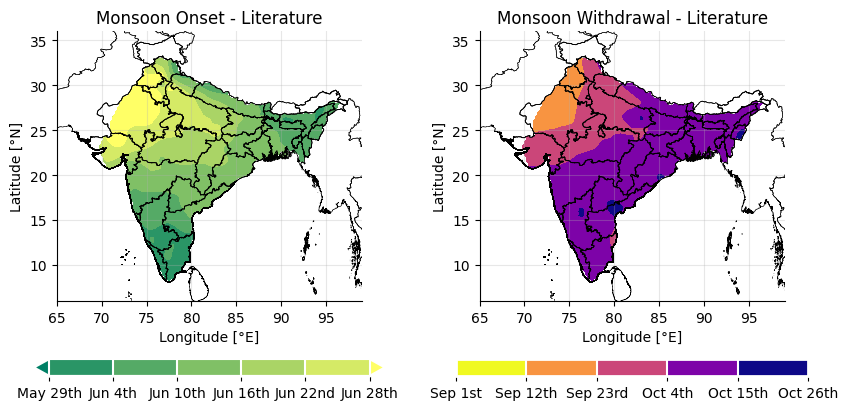

In [8]:
plot_seasons_bk_results( ds_rast.date, figsize=(10,5), cmaps=['summer', 'plasma_r'],
                         lims=[[150,180],[245,300]], titles=['Monsoon Onset - Literature', 'Monsoon Withdrawal - Literature'],
                         country_boundary=country_boundary, world_boundary=world_boundary)

plt.savefig(results_path_image, dpi=300, bbox_inches='tight', transparent=False)